In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import FER2013 dataset

In [ ]:
import pandas as pd

df =pd.read_csv("drive/My Drive/fer2013/icml_face_data.csv")
df.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
#!pip install tensorflow-gpu==2.8.0

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
np.set_printoptions(precision=3, suppress=True)

from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow_addons as tfa




In [ ]:
df[' Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name:  Usage, dtype: int64

Training is training set, PrivateTest is validation set, and PublicTest is testing set

In [ ]:
train_df = df[df[' Usage']=='Training']
#train_df.columns['emotion']
val_df = df[df[' Usage']=='PrivateTest']
test_df = df[df[' Usage']=='PublicTest']

Seperate features and labels

In [ ]:
#separate the features and labels in training set
def split_features_labels(name,mode):
  labels = "fer2013_" + mode + "labels"

  labels = name.pop('emotion').to_frame()
  name.columns=['Usage','pixels']
  print(type(name))
  #print(fer2013_train_features['pixels'])
  name.pop('Usage')
  labels.columns = ['emotion']
  name.reset_index(drop=True,inplace = True)
  labels.reset_index(drop=True,inplace=True)
  return name,labels
  #fer2013_train_features

split features and labels for training, validation, and testing set

In [ ]:
fer2013_train_features = train_df.copy()
fer2013_val_features = val_df.copy()
fer2013_test_features = test_df.copy()
fer2013_train_features,fer2013_train_labels = split_features_labels(fer2013_train_features,"train")
fer2013_val_features,fer2013_val_labels = split_features_labels(fer2013_val_features,"val")
fer2013_test_features,fer2013_test_labels = split_features_labels(fer2013_test_features,"test")

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
fer2013_test_features

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...
3584,178 176 172 173 173 174 176 173 166 166 206 22...
3585,25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...
3586,255 255 255 255 255 255 255 255 255 255 255 25...
3587,33 25 31 36 36 42 69 103 132 163 175 183 187 1...


In [ ]:
fer2013_train_labels.head()

,emotion
0,0
1,0
2,2
3,4
4,6


In [ ]:
fer2013_train_features

,pixels
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,151 150 147 155 148 133 111 140 170 174 182 15...
2,231 212 156 164 174 138 161 173 182 200 106 38...
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...
28704,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,114 112 113 113 111 111 112 113 115 113 114 11...
28706,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


Counting the total number of examples for each type of class(total classes = 7)

In [ ]:
classes = sorted(fer2013_train_labels['emotion'].unique())
print("total number of classes: ",len(classes))
#print(classes)
distribution = fer2013_train_labels.groupby('emotion')['emotion'].value_counts().to_dict()
distribution

total number of classes:  7


{(0, 0): 3995,
 (1, 1): 436,
 (2, 2): 4097,
 (3, 3): 7215,
 (4, 4): 4830,
 (5, 5): 3171,
 (6, 6): 4965}

Plot showing distribution of the seven classes

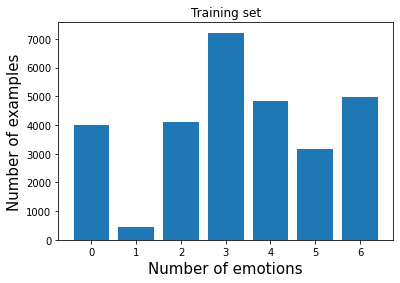

In [ ]:

plt.bar(classes, [distribution[(i, i)] for i in classes])
plt.xlabel('Number of emotions', fontsize=15)
plt.ylabel('Number of examples', fontsize=15)
plt.xticks(classes, classes, fontsize=10)
plt.title('Training set')
plt.show()

Splitting the features and labels from strings into a numpy array of type unint8

In [ ]:
# X_train = np.array(fer2013_features, dtype = 'uint8')
# y_train = np.array(fer2013_labels, dtype = 'uint8')
X_train = []
for index, row in fer2013_train_features.iterrows():
  temp = row['pixels'].split(" ")
  X_train.append(np.array(temp))
print(len(X_train))
X_train = np.array(X_train, dtype = 'uint8')
y_train = fer2013_train_labels.to_numpy(dtype = 'uint8')
print("shape of y_train:",y_train.shape)
print("shape of X_train:",X_train.shape)

28709
shape of y_train: (28709, 1)
shape of X_train: (28709, 2304)


In [ ]:
X_val = []
for index, row in fer2013_val_features.iterrows():
  temp = row['pixels'].split(" ")
  X_val.append(np.array(temp))
print(len(X_val))
X_val = np.array(X_val, dtype = 'uint8')
y_val = fer2013_val_labels.to_numpy(dtype = 'uint8')
print("shape of y_val:",y_val.shape)
print("shape of X_val:",X_val.shape)



3589
shape of y_val: (3589, 1)
shape of X_val: (3589, 2304)


In [ ]:
X_test = []
for index, row in fer2013_test_features.iterrows():
  temp = row['pixels'].split(" ")
  X_test.append(np.array(temp))
print(len(X_test))
X_test = np.array(X_test, dtype = 'uint8')
y_test = fer2013_test_labels.to_numpy(dtype = 'uint8')
print("shape of y_test:",y_test.shape)
print("shape of X_test:",X_test.shape)



3589
shape of y_test: (3589, 1)
shape of X_test: (3589, 2304)


Example image of a toddler in the dataset

(48, 48)


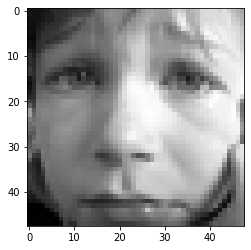

In [ ]:
#fer2013_features.iloc[1]
#visualizing an image from the training dataset
numpy_im = np.mat(X_train[6]).reshape(48,48)
print(numpy_im.shape)
plt.imshow(numpy_im,cmap='gray')
plt.show() 

Reshaping the 1D features into 48 X 48

In [ ]:
X_train = X_train.reshape(X_train.shape[0],48,48,1)
X_val = X_val.reshape(X_val.shape[0],48,48,1)
X_test = X_test.reshape(X_test.shape[0],48,48,1)
print("X_train shape:",X_train.shape)


X_train shape: (28709, 48, 48, 1)


Converting train, validation, and test labels to categorical(one-hot encoding)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

We can see that the training data is unbalanced with very high number of examples from class 3 and lowest concentration of class 1 examples. We will have to balance this data using data augmentation.

Data augmentation of the same image with variations in width, height, zoom, horizontal flip, and shear

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
import cv2

#augmenting data using ImageDataGenerator to augment data in real-time while training
data_generator = ImageDataGenerator(rotation_range=20,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=0.1,
                        fill_mode='nearest',
                        shear_range=0.1,
                        horizontal_flip=True)

val_gen = ImageDataGenerator()

Here you can see the data augmentation applied to get variations in the same image of the toddler that was dispalyed above

(1, 48, 48, 1)


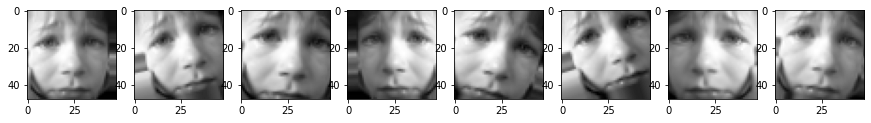

In [ ]:
#visualizing data augmentations for a single image from the training set
img = np.expand_dims(X_train[6],0)
print(img.shape)
train_data1 = data_generator.flow(img,batch_size = 1)
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(15,15))


for i in range(8):
    image = next(train_data1).reshape(48,48)
    #print("shape is",image.shape)
 
    # plot the augmented images
    ax[i].imshow(image,cmap='gray')

Creating data generators for train and validation data. Note: shuffle in validation data is set to False and the batch size will be 64

In [ ]:
data_generator.fit(X_train)
train_data = data_generator.flow(X_train,y_train,batch_size = 64)
val_gen.fit(X_val)
val_data = val_gen.flow(X_val,y_val,batch_size = 64,shuffle=False)


In [ ]:
#y_train
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation,Conv2D, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

dropout 30% of the neurons

In [ ]:
# from tensorflow.keras.applications.vgg16 import VGG16
dropout_rate = 0.3

VGG16 model with additional batch normalization and dropout layers

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(48,48,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(dropout_rate))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(dropout_rate))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(dropout_rate))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(dropout_rate))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(dropout_rate))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(dropout_rate))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(dropout_rate))
model.add(Dense(units=7, activation="softmax"))

This how a block of model looks like

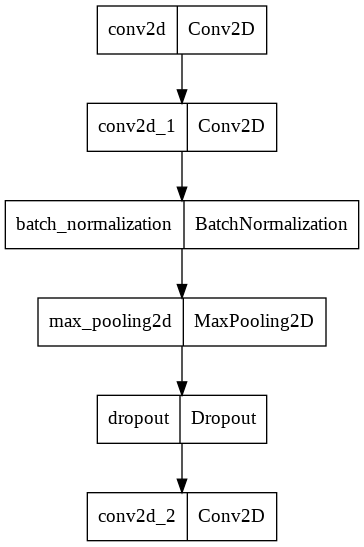

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="drive/My Drive/fer2013/cvit_model_2.png", show_shapes=False, show_layer_names=True,dpi=96,layer_range=['conv2d_1','conv2d_3'],rankdir='TB')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

model checkpoints for monitoring validation loss and accuracy and saving the best models, early stopping after 30 epochs of no improvement in validation accuary, and reducing learning rate by a factor 0.5 after no improvement in validation accuracy for 5 epochs and with lower bound of 1e-7

In [ ]:
#scheduler = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

# checkpoint = ModelCheckpoint('model.h5')
checkpoint_acc = ModelCheckpoint("vgg16_acc.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False,mode='max')
checkpoint_loss = ModelCheckpoint("vgg16_loss.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False,mode='min')
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.5, patience=5, min_lr=1e-7, cooldown=1, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1, patience=30)

Adam optimizer with a learning rate of 0.001

In [ ]:
#from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

Loss as categorical cross entropy

In [ ]:
model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=[
            keras.metrics.CategoricalAccuracy(name="accuracy"),
            ],
    )

Train the model using GPU on colab

In [ ]:
with tf.device("/gpu:0"):
  hist = model.fit_generator(steps_per_epoch=X_train.shape[0] // 64,generator=train_data, validation_data= val_data, validation_steps=X_val.shape[0] //64,epochs=150,callbacks=[checkpoint_acc,checkpoint_loss,early_stopping,lr_reduce])

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


448/448 [==============================] - ETA: 0s - loss: 1.8859 - accuracy: 0.2519
Epoch 1: val_accuracy improved from -inf to 0.28739, saving model to vgg16_acc.h5

Epoch 1: val_loss improved from inf to 1.73223, saving model to vgg16_loss.h5
448/448 [==============================] - 43s 82ms/step - loss: 1.8859 - accuracy: 0.2519 - val_loss: 1.7322 - val_accuracy: 0.2874 - lr: 0.0010
Epoch 2/150
448/448 [==============================] - ETA: 0s - loss: 1.6798 - accuracy: 0.3270
Epoch 2: val_accuracy improved from 0.28739 to 0.40179, saving model to vgg16_acc.h5

Epoch 2: val_loss did not improve from 1.73223
448/448 [==============================] - 34s 76ms/step - loss: 1.6798 - accuracy: 0.3270 - val_loss: 1.7830 - val_accuracy: 0.4018 - lr: 0.0010
Epoch 3/150
448/448 [==============================] - ETA: 0s - loss: 1.5175 - accuracy: 0.4153
Epoch 3: val_accuracy improved from 0.40179 to 0.45117, saving model to vgg16_acc.h5

Epoch 3: val_loss improved from 1.73223 to 1.4397

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

Create a data generator for test data which will be given for prediction on the model

In [ ]:
test_gen = ImageDataGenerator()
test_data = test_gen.flow(X_test,y_test,batch_size = 1,shuffle=False)

predict on the testing data on the model saved with highest validation accuracy

In [ ]:
model.load_weights('vgg16_acc.h5')
y_pred_acc = model.predict_generator(test_data, steps=X_test.shape[0])
#convert probabilities to categorical data
y_pred_cat_acc = np.argmax(y_pred_acc, axis=1)
y_true_cat_acc = np.argmax(test_data.y, axis=1)
result = classification_report(y_true_cat_acc, y_pred_cat_acc)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


              precision    recall  f1-score   support

           0       0.57      0.64      0.60       467
           1       0.68      0.46      0.55        56
           2       0.61      0.46      0.53       496
           3       0.86      0.87      0.87       895
           4       0.58      0.52      0.55       653
           5       0.83      0.83      0.83       415
           6       0.55      0.68      0.61       607

    accuracy                           0.68      3589
   macro avg       0.67      0.64      0.65      3589
weighted avg       0.68      0.68      0.67      3589



predict on the testing data on the model saved with lowest validation loss

In [ ]:
model.load_weights('vgg16_loss.h5')
#predict on the testing data for model with lowest loss
y_pred_loss = model.predict_generator(test_data, steps=X_test.shape[0])
#convert probabilities to categorical data
y_pred_cat_loss = np.argmax(y_pred_loss, axis=1)
y_true_cat_loss = np.argmax(test_data.y, axis=1)
result = classification_report(y_true_cat_loss, y_pred_cat_loss)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


              precision    recall  f1-score   support

           0       0.57      0.65      0.61       467
           1       0.61      0.50      0.55        56
           2       0.59      0.42      0.49       496
           3       0.87      0.87      0.87       895
           4       0.61      0.54      0.57       653
           5       0.80      0.85      0.82       415
           6       0.56      0.68      0.61       607

    accuracy                           0.68      3589
   macro avg       0.66      0.64      0.65      3589
weighted avg       0.68      0.68      0.68      3589



Learning curve for train and validation loss and train and validation accuracy

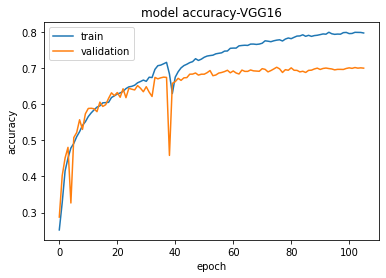

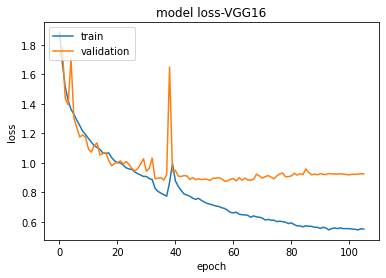

In [ ]:

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy-VGG16')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss-VGG16')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()